## Setup and Data Loading

In [1]:
# Import utilities and libraries
import sys
import os
import importlib

# Add analysis directory to Python path (notebook runs from project root)
analysis_dir = os.path.join(os.getcwd(), 'analysis')
if analysis_dir not in sys.path:
    sys.path.insert(0, analysis_dir)

# Import and reload utils to get latest changes
import utils
importlib.reload(utils)
from utils import *

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
setup_plotting_style()

print("Libraries and utilities imported and reloaded successfully!")

Libraries and utilities imported and reloaded successfully!


## Configuration

Configure the analysis parameters and algorithm folder to analyze.

In [2]:
# Configuration: Set the algorithm folder name here
# Change this to analyze different algorithm results (e.g., "greedy", "genetic", "simulated_annealing", etc.)
ALGORITHM_FOLDER = "candidate_moves"

# Instances to analyze (can be modified as needed)
INSTANCES = ['TSPA', 'TSPB']

# Export settings
EXPORT_ENABLED = False
EXPORT_PLOTS = False
PLOT_FORMAT = 'png'  # Options: 'png', 'pdf', 'svg'
PLOT_DPI = 300

print(f"Configuration set:")
print(f"  Algorithm folder: {ALGORITHM_FOLDER}")
print(f"  Instances: {INSTANCES}")
print(f"  Export enabled: {EXPORT_ENABLED}")
print(f"  Plot format: {PLOT_FORMAT} (DPI: {PLOT_DPI})")

Configuration set:
  Algorithm folder: candidate_moves
  Instances: ['TSPA', 'TSPB']
  Export enabled: False
  Plot format: png (DPI: 300)


In [3]:
# Load algorithm data using utility functions
algorithm_data = load_all_algorithm_results(ALGORITHM_FOLDER, INSTANCES)

if algorithm_data:
    print(f"\nSuccessfully loaded data for {len(algorithm_data)} instances")
    for instance_name, data in algorithm_data.items():
        df = data['df']
        print(f"{instance_name}: {len(df)} results")
else:
    print("No data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")
    print(f"Available algorithm folders: {get_available_algorithm_folders()}")
    for folder in get_available_algorithm_folders():
        instances = get_available_instances(folder)
        print(f"  {folder}: {instances}")

Loaded 800 results for TSPA from candidate_moves folder
Algorithms: ['CandidateMoves_k10_Edges_NearestNeighborAny2Regret_w1_1', 'CandidateMoves_k10_Edges_Random', 'CandidateMoves_k10_Nodes_NearestNeighborAny2Regret_w1_1', 'CandidateMoves_k10_Nodes_Random']
Loaded 800 results for TSPB from candidate_moves folder
Algorithms: ['CandidateMoves_k10_Edges_NearestNeighborAny2Regret_w1_1', 'CandidateMoves_k10_Edges_Random', 'CandidateMoves_k10_Nodes_NearestNeighborAny2Regret_w1_1', 'CandidateMoves_k10_Nodes_Random']

Successfully loaded data for 2 instances
TSPA: 800 results
TSPB: 800 results


## Visualization Data Exporter

This section provides functionality to export visualization data and results to files for use in other analysis tools.

In [4]:
# Create exporter instance using the utility class
exporter = VisualizationExporter(ALGORITHM_FOLDER)
print(f"Visualization exporter created for algorithm folder: {ALGORITHM_FOLDER}")
print(f"Output directory: {exporter.output_dir}")

Visualization exporter created for algorithm folder: candidate_moves
Output directory: ../results/candidate_moves


## Computational Experiment Results

## Export Results

Export the loaded algorithm results to various formats for further analysis and archival.

In [5]:
# Export all results using the visualization exporter
if algorithm_data and EXPORT_ENABLED:
    print("Exporting algorithm results...")
    
    # Export best solutions data
    exporter.export_best_solutions_data(algorithm_data, filename_suffix="_analysis")
    
    # Export statistical summaries
    exporter.export_statistics_summary(algorithm_data, filename_suffix="_analysis")
    
    # Export visualization plots (if enabled)
    if EXPORT_PLOTS:
        exporter.export_visualization_plots(algorithm_data, filename_suffix="_analysis", 
                                           save_format=PLOT_FORMAT, dpi=PLOT_DPI)
    
    print(f"\nAll exports completed! Files saved to: {exporter.output_dir}")
    print(f"Algorithm folder: {ALGORITHM_FOLDER}")
elif not EXPORT_ENABLED:
    print("Export is disabled. Set EXPORT_ENABLED = True to enable exporting.")
else:
    print("No algorithm data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")

Export is disabled. Set EXPORT_ENABLED = True to enable exporting.


In [6]:
# Display algorithm statistics using utility function
display_algorithm_statistics(algorithm_data)


INSTANCE: TSPA

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
CandidateMoves_k10_Edges_NearestNeighborAny2Regret_w1_1 200      69540.00   73830.00   70950.55   YES       
CandidateMoves_k10_Nodes_NearestNeighborAny2Regret_w1_1 200      69801.00   75440.00   72038.13   YES       
CandidateMoves_k10_Nodes_Random 200      82373.00   98681.00   90248.02   YES       
CandidateMoves_k10_Edges_Random 200      71665.00   80727.00   74166.95   YES       

INSTANCE: TSPB

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
CandidateMoves_k10_Edges_NearestNeighborAny2Regret_w1_1 200 

In [7]:
# Compare computation times across all algorithms
print("=== COMPUTATION TIME COMPARISON ===\n")

for instance_name, data in algorithm_data.items():
    df = data['df']
    print(f"Instance: {instance_name}")
    print("-" * 50)
    # Clean algorithm names by removing trailing numbers
    df['algorithm'] = df['algorithm'].str.replace(r'_start\d+$', '', regex=True)
    # Group by algorithm and calculate statistics for computation time
    time_stats = df.groupby('algorithm')['computation_time_ms'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)
    
    # Sort by mean computation time
    time_stats = time_stats.sort_values('mean')
    
    print(time_stats)
    print()

=== COMPUTATION TIME COMPARISON ===

Instance: TSPA
--------------------------------------------------
                                                    count  mean   std  min  \
algorithm                                                                    
CandidateMoves_k10_Edges_NearestNeighborAny2Reg...    200  4.01  0.38    3   
CandidateMoves_k10_Nodes_NearestNeighborAny2Reg...    200  4.14  1.33    3   
CandidateMoves_k10_Edges_Random                       200  7.31  0.98    6   
CandidateMoves_k10_Nodes_Random                       200  8.62  3.22    6   

                                                    max  
algorithm                                                
CandidateMoves_k10_Edges_NearestNeighborAny2Reg...    5  
CandidateMoves_k10_Nodes_NearestNeighborAny2Reg...   14  
CandidateMoves_k10_Edges_Random                      12  
CandidateMoves_k10_Nodes_Random                      46  

Instance: TSPB
--------------------------------------------------
             

## 2D Visualization of Best Solutions


TSPA - BEST SOLUTIONS



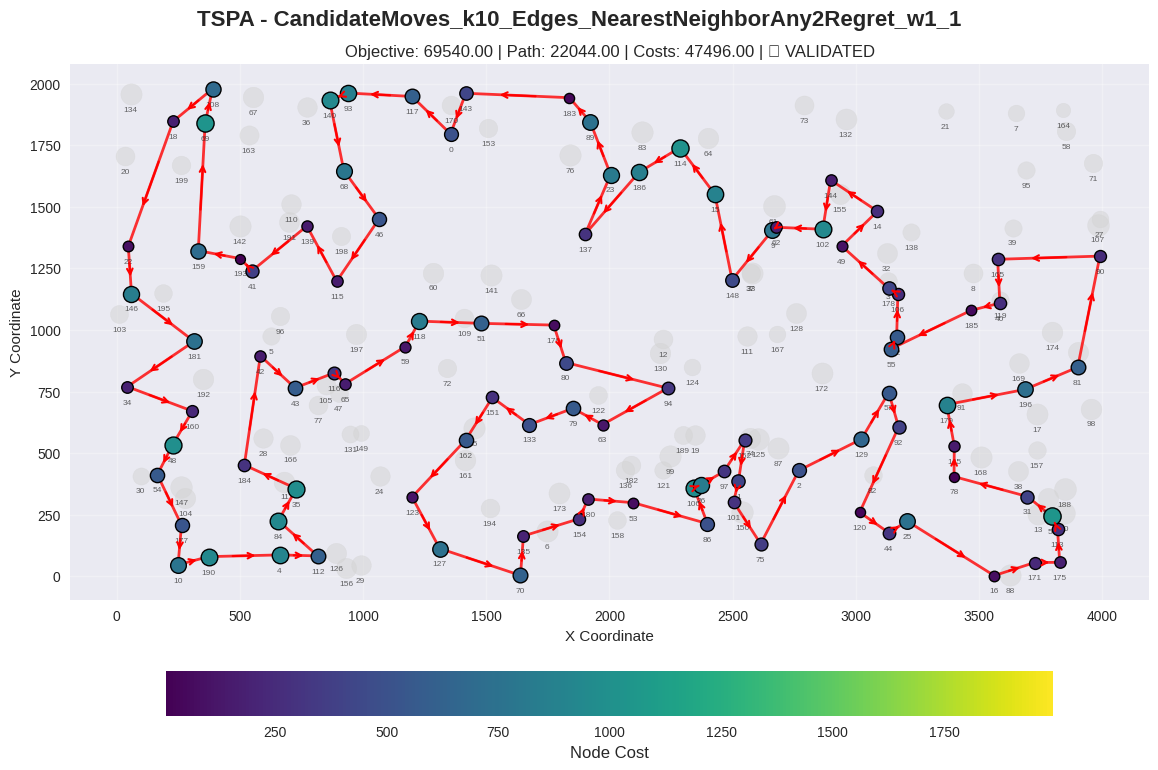


CandidateMoves_k10_Edges_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 69540.00
Path Length: 22044.00
Node Costs: 47496.00
Selected Nodes: 100

Node Order (Route):
2, 129, 57, 92, 120, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 196, 81, 90, 165, 40, 185, 55, 52, 106, 178, 49, 14, 144, 102, 62, 9, 148, 15, 114, 186, 137, 23, 89, 183, 143, 0, 117, 93, 140, 68, 46, 115, 139, 41, 193, 159, 69, 108, 18, 22, 146, 181, 34, 160, 48, 54, 177, 10, 190, 4, 112, 84, 35, 184, 42, 43, 116, 65, 59, 118, 51, 176, 80, 94, 63, 79, 133, 151, 162, 123, 127, 70, 135, 154, 180, 53, 86, 100, 26, 97, 152, 1, 101, 75




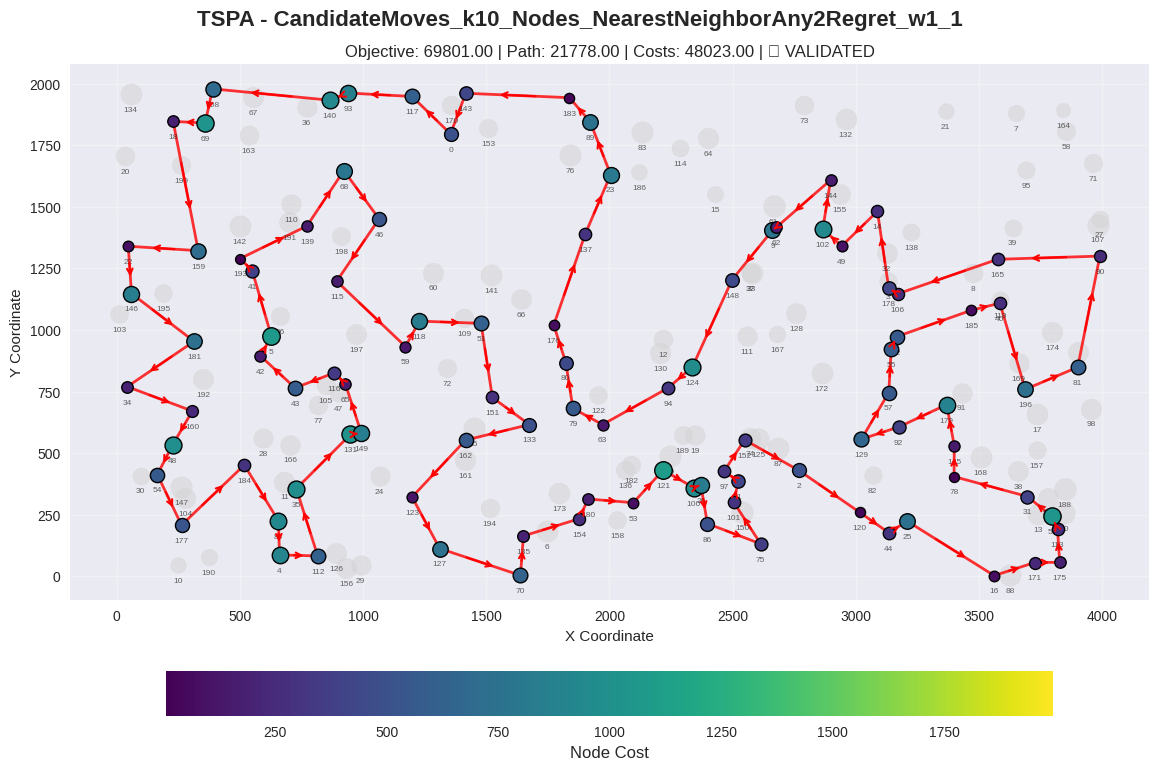


CandidateMoves_k10_Nodes_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 69801.00
Path Length: 21778.00
Node Costs: 48023.00
Selected Nodes: 100

Node Order (Route):
108, 69, 18, 159, 22, 146, 181, 34, 160, 48, 54, 177, 184, 84, 4, 112, 35, 131, 149, 65, 116, 43, 42, 5, 41, 193, 139, 68, 46, 115, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 154, 180, 53, 121, 100, 26, 86, 75, 101, 1, 97, 152, 2, 120, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 129, 57, 55, 52, 185, 40, 196, 81, 90, 165, 106, 178, 14, 49, 102, 144, 62, 9, 148, 124, 94, 63, 79, 80, 176, 137, 23, 89, 183, 143, 0, 117, 93, 140




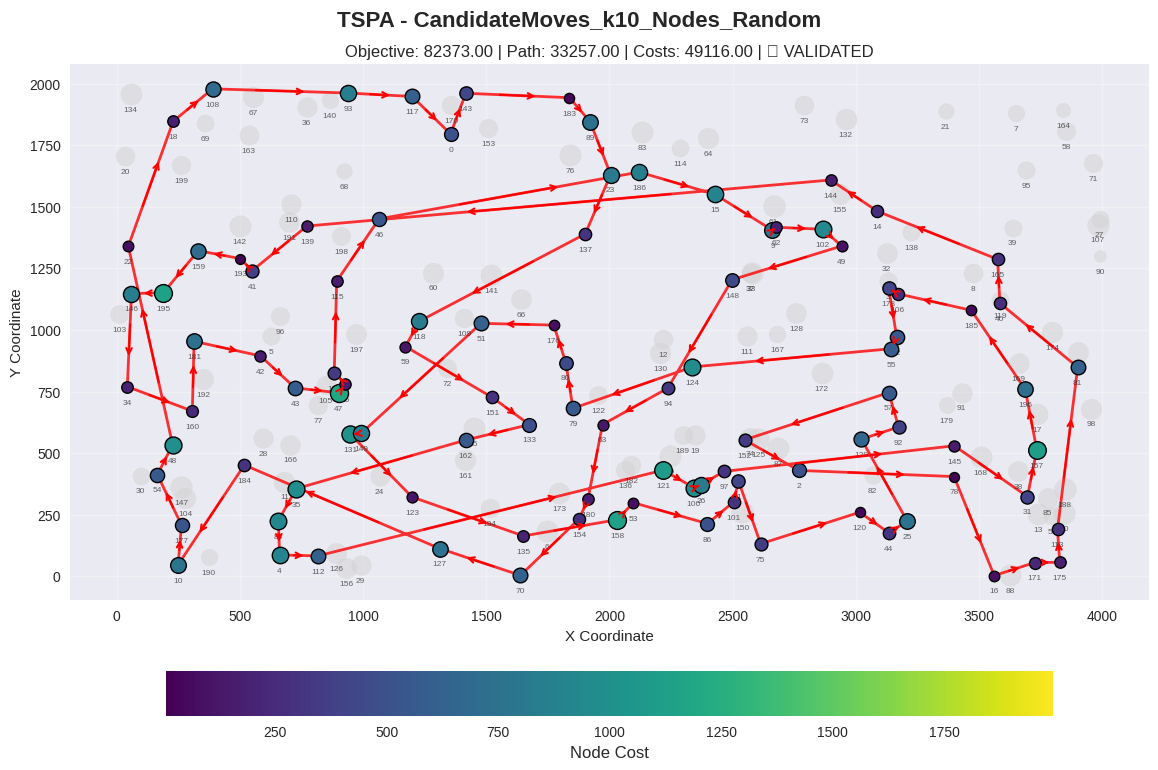


CandidateMoves_k10_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 82373.00
Path Length: 33257.00
Node Costs: 49116.00
Selected Nodes: 100

Node Order (Route):
117, 0, 143, 183, 89, 23, 137, 118, 59, 151, 133, 162, 35, 84, 4, 112, 121, 100, 26, 97, 145, 31, 157, 196, 185, 106, 178, 52, 55, 124, 79, 80, 176, 51, 149, 131, 123, 135, 158, 53, 86, 101, 1, 75, 120, 44, 25, 129, 92, 57, 152, 2, 78, 16, 171, 175, 113, 81, 40, 165, 14, 144, 139, 41, 193, 159, 195, 146, 34, 160, 181, 42, 43, 47, 65, 116, 115, 46, 186, 15, 9, 62, 102, 49, 148, 94, 63, 180, 154, 70, 127, 184, 10, 177, 54, 48, 22, 18, 108, 93




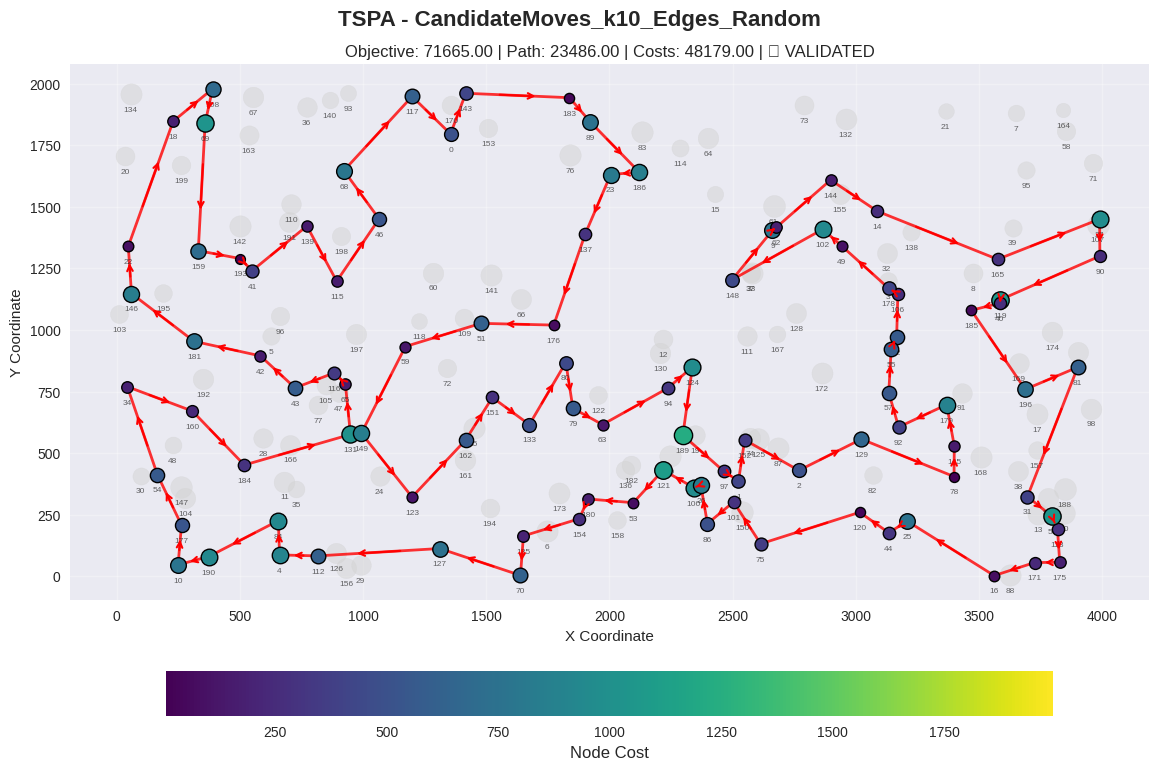


CandidateMoves_k10_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 71665.00
Path Length: 23486.00
Node Costs: 48179.00
Selected Nodes: 100

Node Order (Route):
78, 145, 179, 92, 57, 55, 52, 106, 178, 49, 102, 148, 9, 62, 144, 14, 165, 27, 90, 119, 40, 185, 196, 81, 31, 56, 113, 175, 171, 16, 25, 44, 120, 75, 101, 86, 26, 100, 121, 53, 180, 154, 135, 70, 127, 112, 4, 84, 190, 10, 177, 54, 34, 160, 184, 131, 65, 116, 43, 42, 181, 146, 22, 18, 108, 69, 159, 193, 41, 139, 115, 46, 68, 117, 0, 143, 183, 89, 186, 23, 137, 176, 51, 59, 149, 123, 162, 151, 133, 80, 79, 63, 94, 124, 189, 97, 1, 152, 2, 129



TSPB - BEST SOLUTIONS



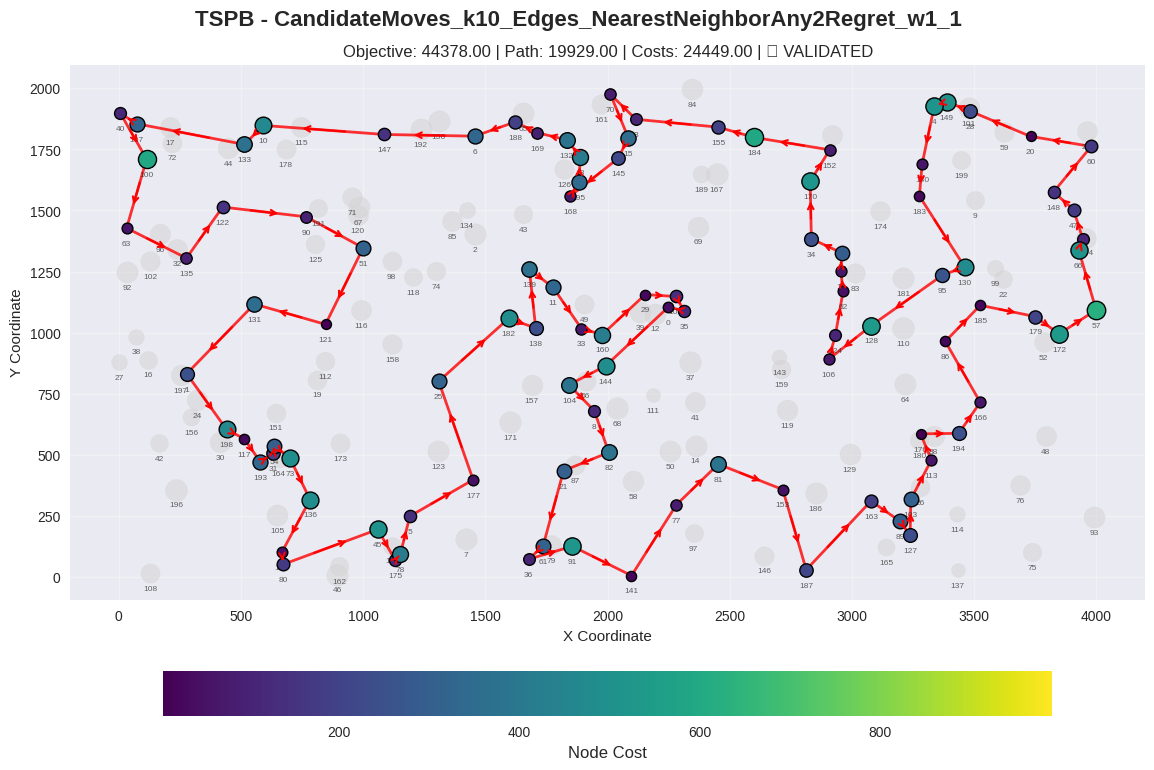


CandidateMoves_k10_Edges_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 44378.00
Path Length: 19929.00
Node Costs: 24449.00
Selected Nodes: 100

Node Order (Route):
10, 133, 107, 40, 100, 63, 135, 122, 90, 51, 121, 131, 1, 198, 117, 193, 31, 54, 73, 136, 190, 80, 45, 175, 78, 5, 177, 25, 182, 138, 139, 11, 33, 160, 29, 109, 35, 0, 144, 104, 8, 82, 21, 61, 36, 91, 141, 77, 81, 153, 187, 163, 89, 127, 103, 113, 176, 194, 166, 86, 185, 179, 172, 57, 66, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 130, 95, 128, 106, 124, 62, 18, 55, 34, 170, 152, 184, 155, 3, 70, 15, 145, 168, 195, 13, 132, 169, 188, 6, 147




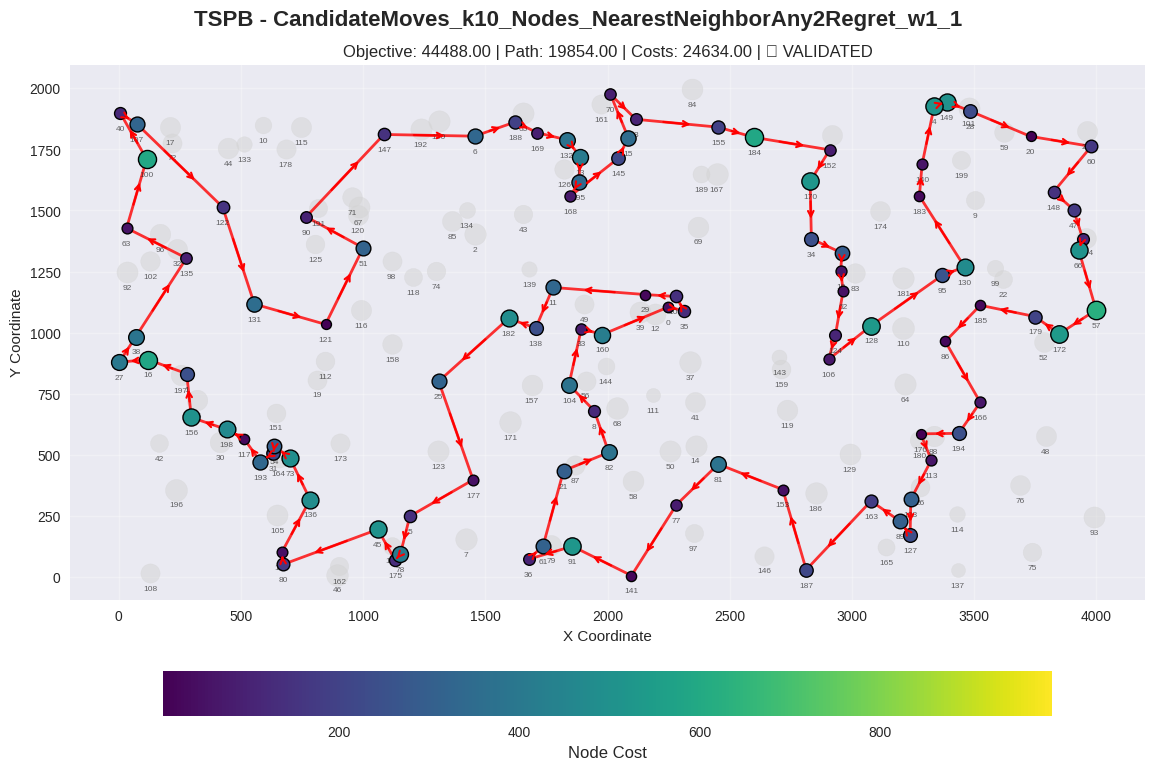


CandidateMoves_k10_Nodes_NearestNeighborAny2Regret_w1_1
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 44488.00
Path Length: 19854.00
Node Costs: 24634.00
Selected Nodes: 100

Node Order (Route):
131, 121, 51, 90, 147, 6, 188, 169, 132, 13, 195, 168, 145, 15, 70, 3, 155, 184, 152, 170, 34, 55, 18, 62, 124, 106, 128, 95, 130, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 57, 172, 179, 185, 86, 166, 194, 176, 113, 103, 127, 89, 163, 187, 153, 81, 77, 141, 91, 36, 61, 21, 82, 8, 104, 33, 160, 0, 35, 109, 29, 11, 138, 182, 25, 177, 5, 78, 175, 45, 80, 190, 136, 73, 54, 31, 193, 117, 198, 156, 1, 16, 27, 38, 135, 63, 100, 40, 107, 122




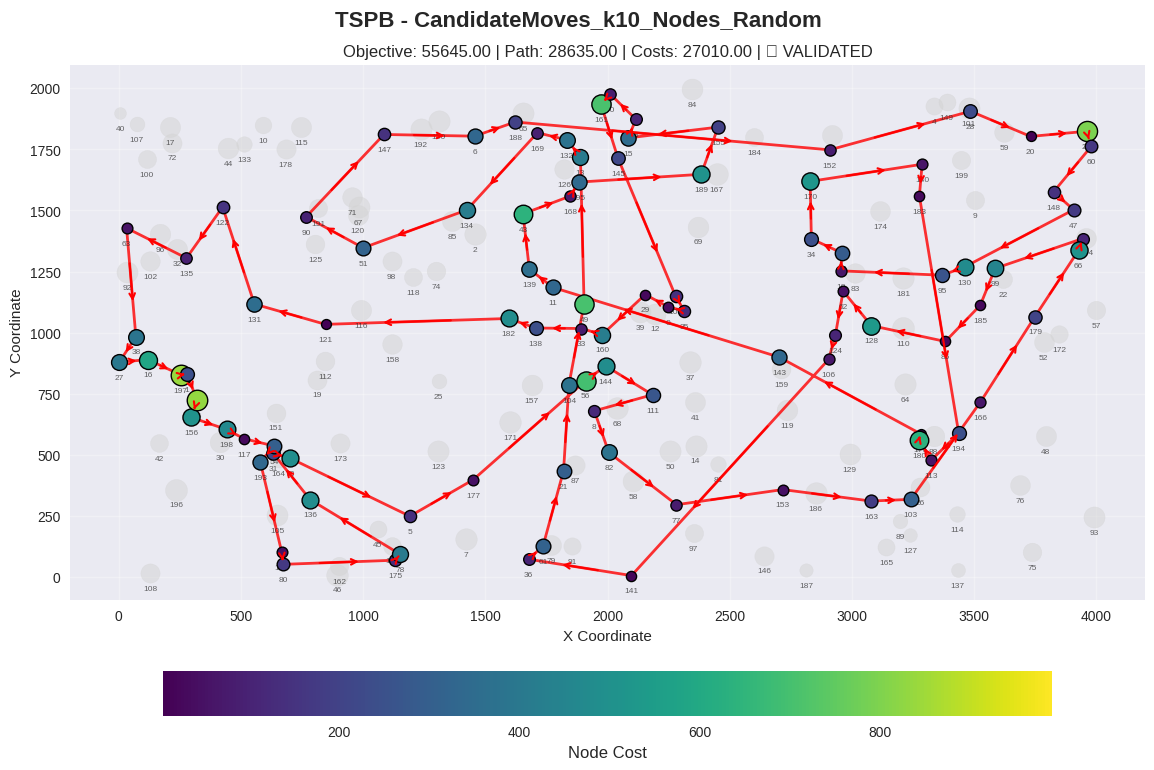


CandidateMoves_k10_Nodes_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 55645.00
Path Length: 28635.00
Node Costs: 27010.00
Selected Nodes: 100

Node Order (Route):
24, 156, 198, 117, 54, 193, 190, 80, 175, 78, 136, 31, 73, 5, 177, 56, 144, 111, 8, 82, 77, 153, 163, 103, 166, 179, 66, 94, 99, 185, 86, 128, 62, 124, 106, 141, 36, 61, 21, 104, 49, 13, 132, 169, 134, 51, 90, 147, 6, 188, 152, 28, 20, 23, 60, 148, 47, 130, 95, 18, 55, 34, 170, 140, 183, 194, 113, 180, 176, 143, 11, 139, 43, 168, 195, 189, 155, 15, 3, 70, 161, 145, 109, 35, 0, 29, 160, 33, 138, 182, 121, 131, 122, 135, 63, 38, 27, 16, 197, 1




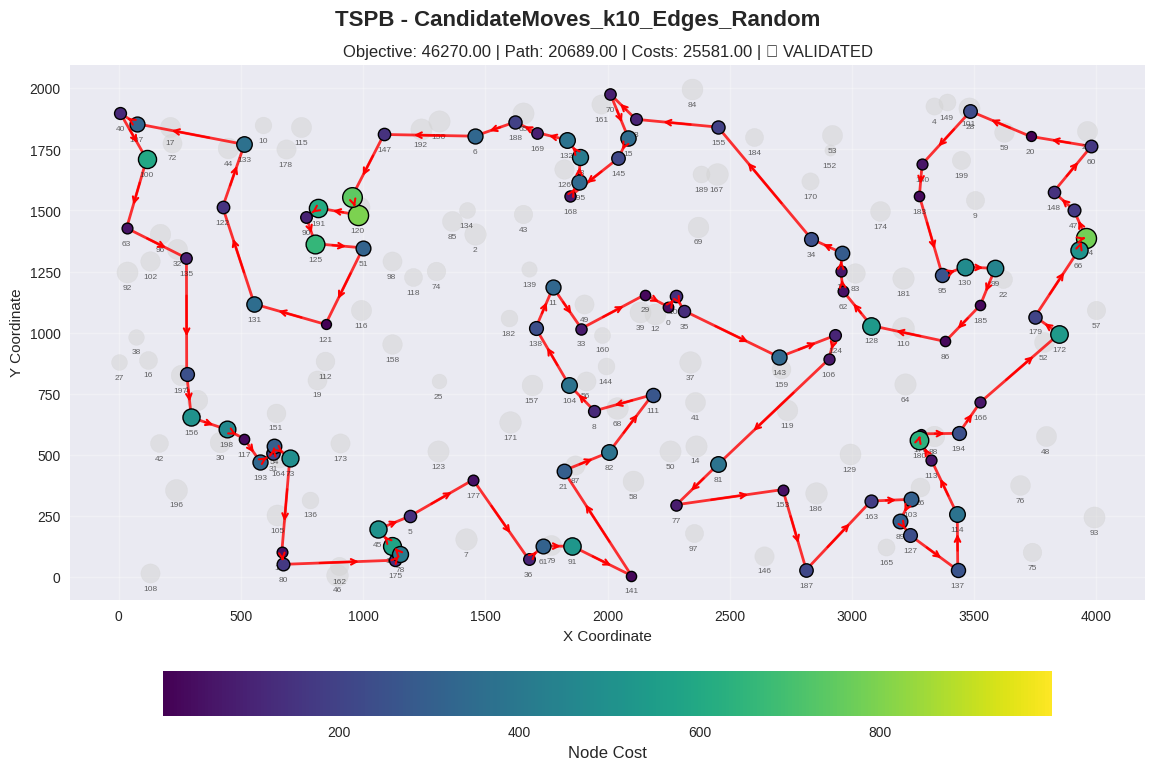


CandidateMoves_k10_Edges_Random
--------------------------------------------------------------------------------
Status: ✓ VALIDATED
Objective Value: 46270.00
Path Length: 20689.00
Node Costs: 25581.00
Selected Nodes: 100

Node Order (Route):
185, 86, 128, 62, 18, 55, 34, 155, 3, 70, 15, 145, 168, 195, 13, 132, 169, 188, 6, 147, 71, 120, 191, 90, 125, 51, 121, 131, 122, 133, 107, 40, 100, 63, 135, 1, 156, 198, 117, 193, 31, 54, 73, 190, 80, 175, 78, 142, 45, 5, 177, 36, 61, 91, 141, 21, 82, 111, 8, 104, 138, 11, 33, 29, 0, 109, 35, 143, 124, 106, 81, 77, 153, 187, 163, 103, 89, 127, 137, 114, 113, 180, 176, 194, 166, 172, 179, 66, 94, 154, 47, 148, 60, 20, 28, 140, 183, 95, 130, 99




In [8]:
# Plot best solutions using utility function
plot_best_solutions(algorithm_data)

## Algorithm Performance Comparison

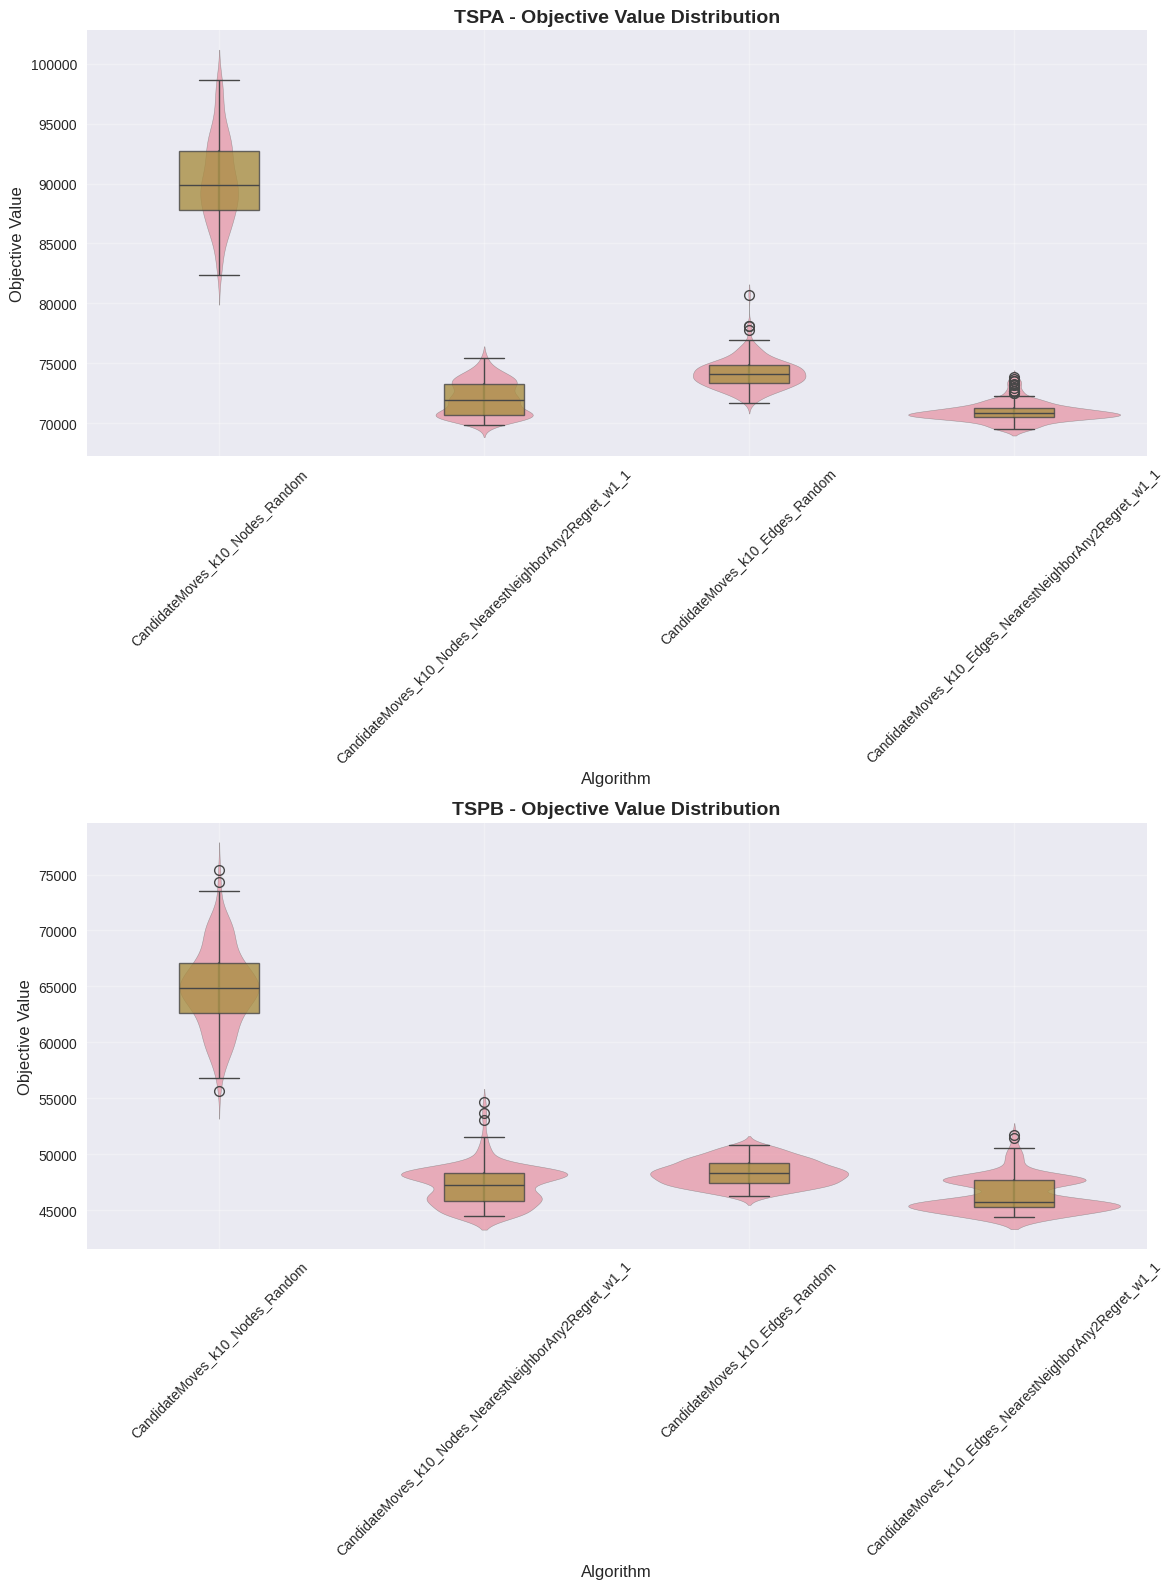

In [9]:
# Performance comparison plots using utility functions
plot_objective_distributions(algorithm_data)